In [1]:
!pip install typing langchain langgraph 

In [2]:
from typing import Dict, TypedDict,List
import random
from langgraph.graph import StateGraph,START,END   #framework that helps you design and manage the flow of tasks in your application

In [3]:
class AgentState(TypedDict):
    """State of the agent."""
    player_name: str
    target_number:int
    guess:List[str]
    upper_bound:int
    lower_bound:int
    attempts:int





In [4]:
def setup(state:AgentState)->AgentState:
    """initializing the values"""

    state['upper_bound']=20
    state['lower_bound']=1
    state['guess']=[]
    state['attempts']=0
    return state

def guess(state:AgentState)->AgentState:
    """Make a guess"""
    guess = random.randint(state['lower_bound'],state['upper_bound'])
    state['guess'].append(guess)
    return state


def reduce_bounds(state:AgentState)->AgentState:
    if state['guess'][-1] < state['target_number']:
        print(f'you have guessed lower {state["guess"][-1]}')
        state['lower_bound'] = state['guess'][-1] + 1
    elif state['guess'][-1] > state['target_number']:
        print(f'you have guessed higher {state["guess"][-1]}')
        state['upper_bound'] = state['guess'][-1] - 1

    return state

def decide(state:AgentState)->AgentState:
    """Decide whether to continue or end the game"""
    if state['attempts']>7 or state['guess'][-1] == state['target_number']:
        return 'END'

    state['attempts'] = state['attempts']+ 1
    print(state)
    return 'guess_node'



In [5]:
graph = StateGraph(AgentState)

graph.add_node('setup',setup)
graph.add_node('guess',guess)
graph.add_node('reduce_bound',reduce_bounds)


#add start point
graph.add_edge(START,'setup')
#add edges
graph.add_edge('setup','guess')
graph.add_edge('guess','reduce_bound')
graph.add_conditional_edges(
    'reduce_bound',
    decide,
    {
        'END':END,
        'guess_node':'guess'
    }

)


app = graph.compile()

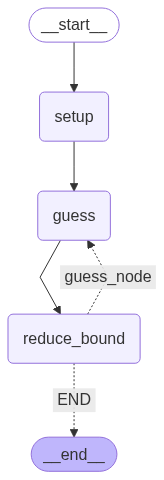

In [6]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
app.invoke({
    'player_name': 'John',
    'target_number': 12,
    'guess': [],
    'upper_bound': 20,
    'lower_bound': 1,
    'attempts': 0
})

you have guessed lower 10
{'player_name': 'John', 'target_number': 12, 'guess': [10], 'upper_bound': 20, 'lower_bound': 11, 'attempts': 1}


{'player_name': 'John',
 'target_number': 12,
 'guess': [10, 12],
 'upper_bound': 20,
 'lower_bound': 11,
 'attempts': 0}